<a href="https://colab.research.google.com/github/carlibeisel/pod_pou_lulcc/blob/main/*irrigation_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identifying Pivot Irrigated Land for Diversions

By: Carli Beisel

Adapted from David Ketchum (Github: dgketchum)

Created on May 13, 2024

Modified on May 17, 2024

Purpose:

1) Crop Irrigated Fields Shapefiles to each diversion in the Treasure Valley.

2) Finds pivot irrigated areas in irrigation shapefile. This code assumes that circles/arcs in the landscape represent pivot irrigation. This script finds arcs in polygon geometries of the shapefile, and writes a new attribute called "pivot". This Script is directly from David Ketchum.

3) Sums area of pivot irrigation for each shapefile and combines into one dataframe. The created dataframe that has two columns: year and total acres of pivot irrigation.

4) Generates a regression plot of irrigation change over time with the genderated dataframe.

5) Creates a new dataframe based on regression for input into the model.

## 1. Crop Irrigated Fields Shapefiles to each diversion.

In [ ]:
# ------------------ #
#  Import Libraries  #
# ------------------ #
import numpy as np
import pandas as pd
import geopandas as gpd
! pip install pandarallel
from pandarallel import pandarallel
import glob
import os
from shapely.geometry import shape

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -------------------------------------------------- #
#  Crop Irrigated Field Shapefile to Diversion POUs  #
# -------------------------------------------------- #

div_pou = gpd.read_file('/content/drive/MyDrive/Data/pod_pou_lulcc/data_input/POUs/POUs_EDIT_060622_Merge.shp') #open shapefile
names = div_pou['WaterRight']
irrigated_field_files = glob.glob('/content/drive/MyDrive/Data/irrigation_shapefiles/irrigated_land_only/*.shp')
output_dir = '/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields'

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Create function to crop shapefile to each diversion POU area
def crop_shapefiles(irrigated_field_files, div_pou, output_dir):
    mask_gdf = div_pou
    for field_file in irrigated_field_files:
        input_gdf = gpd.read_file(field_file)
        if input_gdf.crs != mask_gdf.crs:
            input_gdf = input_gdf.to_crs(mask_gdf.crs)
        for i, mask_feature in mask_gdf.iterrows():
            mask_geom = mask_feature['geometry']
            mask_name = mask_feature['WaterRight']
            cropped_gdf = gpd.overlay(input_gdf, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')
            field_name = os.path.splitext(os.path.basename(field_file))[0]
            output_filename = os.path.join(output_dir, f"{field_name}_{mask_name}_cropped.shp")
            cropped_gdf.to_file(output_filename)
            print(f"Cropped shapefile saved to {output_filename}")

crop_shapefiles(irrigated_field_files, div_pou, output_dir)

Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Andrews_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Atwell_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Ballentyne_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Barber_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Bates_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Baxter_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Boise City_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_ir

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Shakespeare_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Siebenberg Canal_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Stutheit_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Suez_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Surprise Valley Micron_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Thomas Aiken_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/D

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Atwell_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Ballentyne_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Barber_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Bates_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Baxter_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Boise City_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_ir

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Shakespeare_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Siebenberg Canal_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Stutheit_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Suez_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Surprise Valley Micron_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Thomas Aiken_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/D

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Atwell_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Ballentyne_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Barber_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Bates_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Baxter_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Boise City_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_ir

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Atwell_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Ballentyne_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Barber_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Bates_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Baxter_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Boise City_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_ir

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Atwell_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Ballentyne_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Barber_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Bates_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Baxter_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Boise City_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_ir

Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Andrews_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Atwell_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Ballentyne_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Barber_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Bates_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Baxter_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Boise City_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_ir

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Shakespeare_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Siebenberg Canal_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Stutheit_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Suez_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Surprise Valley Micron_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Thomas Aiken_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/D

Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Andrews_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Atwell_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Ballentyne_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Barber_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Bates_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Baxter_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Boise City_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_ir

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Ballentyne_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Barber_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Bates_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Baxter_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Boise City_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Boise City Parks_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Boise Valley_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Bowman and Swisher_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Bubb_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Caldwell Highline_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Caldwell Lowline_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Campbell_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Canyon County Canal_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Capital View 1_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Conway Hamming_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Crawforth_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Eagle Island State Park_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Ester Simplot_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Eureka No1_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Eureka No2_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Fairview Acres_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Farmers Union_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Franklin_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Golden Gate_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Graham-Gilbert_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Haas_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Hart-Davis_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Island Highline_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Lemp_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Lower Centerpoint_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model

/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Phyllis_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Pioneer Ditch_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Quinns Pond_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Ridenbaugh_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_River Run_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Riverside Canal_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Riverside Village_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Rossi Mill_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Sebree_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Settlers_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Seven Suckers_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Shakespeare_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Siebenberg Canal_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Stutheit_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Suez_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Surprise Valley Micron_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Thomas Aiken_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Thurman Mill_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Upper Centerpoint_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Vale Pump_cropped.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Wagner_cropped.shp


/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2022_irrigated_Warm Springs_cropped.shp


## 2. Find pivot irrigated areas in each diversion's irrigation shapefile.

This code assumes that circles/arcs in the landscape represent pivot irrigation. This script finds arcs in polygon geometries of the shapefile, and writes a new attribute called "pivot".

This script is directly from David Ketchum.

In [1]:
# ------------------ #
#  Import Libraries  #
# ------------------ #
import numpy as np
import pandas as pd
import geopandas as gpd
! pip install pandarallel
from pandarallel import pandarallel
import glob
import os
from shapely.geometry import shape

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ------------------------------------------ #
#       Create Pivot_Test Function           #
# ------------------------------------------ #

min_arc = 10
tol = 0.22

def area_flood_irrigation(shp):
    df = gpd.read_file(shp)
    p = df[df['IType'] == 'P']['geometry']
    p = np.sum([g.area for g in p])
    s = df[df['IType'] == 'S']['geometry']
    s = np.sum([g.area for g in s])
    f = df[df['IType'] == 'F']['geometry']
    f = np.sum([g.area for g in f])
    t = p + s + f
    print('pivot: {:.3f} sqkm, {:.3f}'.format(p / 1e6, p / t))
    print('sprinkler: {:.3f} sqkm, {:.3f}'.format(s / 1e6, s / t))
    print('flood: {:.3f} sqkm, {:.3f}'.format(f / 1e6, f / t))

def bearing(a, b):
    lat1 = np.radians(a[0])
    lat2 = np.radians(b[0])

    diffLong = np.radians(b[1] - a[1])

    x = np.sin(diffLong) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1)
                                       * np.cos(lat2) * np.cos(diffLong))

    return np.arctan2(x, y)

def find_arcs(g):
    verts = g.exterior.coords
    arc_ct, b_prev = 0, np.pi
    for i, v in enumerate(verts):
        try:
            next = verts[i + 1]
        except IndexError:
            break
        b = bearing(v, next)
        diff = b - b_prev
        if diff < tol:
            arc_ct += 1
            if arc_ct >= min_arc:
                return True
        else:
            arc_ct = 0
        b_prev = b

    return False

def pivot_test(in_shp, out_shp):
    pandarallel.initialize(use_memory_fs=False, progress_bar=True)

    df = gpd.read_file(in_shp).explode()
    df.index = range(df.shape[0])
    print('{} features'.format(df.shape[0]))
    df['arc'] = df.geometry.apply(lambda g: find_arcs(g))
    df['arc'] = df.geometry.parallel_apply(find_arcs)
    df.to_file(out_shp, crs='epsg:4326')
    print('{} of {} features have an arc'.format(np.count_nonzero(df['arc']), df.shape[0]))

In [6]:
# --------------------------------------------------- #
#        Run Pivot_Test for each Shapefile            #
# --------------------------------------------------- #

files = glob.glob('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/*.shp')
output_dir = '/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot'

if __name__ == '__main__':
    for file in files:
        base_name = file.split('/')[-1].split('.')[0].replace('irrigated_', '')
        base_name = base_name.replace('_cropped', '')  # Remove "_cropped"

        # Extract the year from the base_name if present and remove it
        file_year = None
        for year in years:
            if str(year) in base_name:
                file_year = year
                base_name = base_name.replace(str(year), '').strip('_')  # Remove the year from the base_name
                break

        # If the year is found in the file name, process the file
        if file_year:
            out_shp = f'{output_dir}/{base_name}_{file_year}_arcs.shp'
            print(f'Processing file: {file}, Year: {file_year}')
            try:
                pivot_test(file, out_shp)
            except Exception as e:
                print(f"Failed to process {file} for year {file_year}: {e}")

Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Andrews_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
199 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 199 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Atwell_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Atwell_cropped.shp for year 1987: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Ballentyne_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
91 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 91 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Barber_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Bates_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
15 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 15 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Baxter_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
33 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 33 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Boise City_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
18 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 18 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Boise City Parks_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Boise Valley_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
274 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 274 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Bowman and Swisher_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
35 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 35 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Bubb_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
6 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 6 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Caldwell Highline_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2868 features


10 of 2868 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Caldwell Lowline_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2595 features


7 of 2595 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Campbell_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
53 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 53 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Canyon County Canal_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
408 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 408 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Capital View 1_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
74 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 74 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Conway Hamming_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
36 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 36 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Crawforth_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Eagle Island State Park_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
39 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 39 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Ester Simplot_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Eureka No1_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
154 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 154 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Eureka No2_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
268 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 268 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Fairview Acres_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Farmers Union_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


817 features


11 of 817 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Franklin_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
221 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 221 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Golden Gate_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
6 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 6 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Graham-Gilbert_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
43 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


17 of 43 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Haas_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
46 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 46 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Hart-Davis_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
50 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 50 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Island Highline_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
104 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 104 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Lemp_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
21 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 21 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Lower Centerpoint_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
92 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 92 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Mace-Mace_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
15 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 15 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Mace Catlin_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
48 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 48 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Mammon_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
14 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 14 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_McConnell Island_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
83 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 83 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_McCurry Pump_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_McManus and Teater_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Middleton_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1097 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 1097 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_New Dry Creek_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
330 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 330 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_New Union_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
58 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 58 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_New York Canal_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


16603 features


203 of 16603 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Parma Ditch_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
101 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 101 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Penitentiary Canal_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
19 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 19 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Phyllis_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2599 features


7 of 2599 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Pioneer Ditch_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
138 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 138 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Quinns Pond_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Ridenbaugh_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5353 features


31 of 5353 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_River Run_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
6 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 6 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Riverside Canal_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1202 features


54 of 1202 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Riverside Village_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Rossi Mill_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
14 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 14 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Sebree_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1607 features


3 of 1607 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Settlers_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1160 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 1160 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Seven Suckers_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
18 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 18 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Shakespeare_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Shakespeare_cropped.shp for year 1987: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Siebenberg Canal_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
40 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 40 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Stutheit_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Suez_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1558 features


20 of 1558 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Surprise Valley Micron_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Thomas Aiken_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
16 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 16 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Thurman Mill_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
84 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 84 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Upper Centerpoint_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
53 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 53 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Vale Pump_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Wagner_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1987_irrigated_Warm Springs_cropped.shp, Year: 1987
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
41 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 41 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Andrews_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
170 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 170 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Atwell_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Atwell_cropped.shp for year 1994: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Ballentyne_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
78 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 78 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Barber_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
11 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 11 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Bates_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Baxter_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
25 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 25 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Boise City_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
14 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 14 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Boise City Parks_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Boise Valley_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
209 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


20 of 209 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Bowman and Swisher_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
34 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 34 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Bubb_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Caldwell Highline_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2999 features


179 of 2999 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Caldwell Lowline_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2685 features


147 of 2685 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Campbell_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
60 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 60 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Canyon County Canal_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
421 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


33 of 421 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Capital View 1_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
48 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 48 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Conway Hamming_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
17 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 17 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Crawforth_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Eagle Island State Park_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
44 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 44 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Ester Simplot_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Eureka No1_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
130 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


24 of 130 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Eureka No2_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
286 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


12 of 286 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Fairview Acres_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Farmers Union_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


688 features


57 of 688 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Franklin_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
228 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


23 of 228 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Golden Gate_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
14 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 14 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Graham-Gilbert_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
40 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


23 of 40 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Haas_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
32 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 32 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Hart-Davis_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
50 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 50 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Island Highline_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
100 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 100 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Lemp_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
17 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 17 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Lower Centerpoint_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
83 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


11 of 83 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Mace-Mace_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
11 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 11 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Mace Catlin_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
45 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


12 of 45 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Mammon_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_McConnell Island_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
87 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 87 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_McCurry Pump_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_McManus and Teater_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
11 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 11 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Middleton_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1030 features


94 of 1030 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_New Dry Creek_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
311 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


8 of 311 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_New Union_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
35 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 35 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_New York Canal_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


16981 features


991 of 16981 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Parma Ditch_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
91 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 91 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Penitentiary Canal_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
5 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 5 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Phyllis_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2695 features


147 of 2695 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Pioneer Ditch_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
132 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


13 of 132 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Quinns Pond_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Ridenbaugh_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5246 features


288 of 5246 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_River Run_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Riverside Canal_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1100 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


65 of 1100 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Riverside Village_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Rossi Mill_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Sebree_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1490 features


23 of 1490 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Settlers_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
942 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


64 of 942 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Seven Suckers_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
25 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 25 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Shakespeare_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Shakespeare_cropped.shp for year 1994: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Siebenberg Canal_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
44 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 44 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Stutheit_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Suez_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1247 features


186 of 1247 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Surprise Valley Micron_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
48 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


10 of 48 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Thomas Aiken_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
16 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 16 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Thurman Mill_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
57 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


15 of 57 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Upper Centerpoint_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
68 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 68 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Vale Pump_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Wagner_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/1994_irrigated_Warm Springs_cropped.shp, Year: 1994
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
39 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


11 of 39 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Andrews_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
156 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 156 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Atwell_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Atwell_cropped.shp for year 2000: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Ballentyne_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
69 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 69 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Barber_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Bates_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Baxter_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
26 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 26 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Boise City_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
20 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 20 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Boise City Parks_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Boise Valley_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
172 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 172 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Bowman and Swisher_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
34 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 34 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Bubb_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Caldwell Highline_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2666 features


43 of 2666 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Caldwell Lowline_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2409 features


41 of 2409 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Campbell_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
46 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 46 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Canyon County Canal_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
367 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 367 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Capital View 1_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
49 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 49 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Conway Hamming_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
18 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 18 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Crawforth_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Eagle Island State Park_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
45 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 45 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Ester Simplot_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Eureka No1_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
117 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


10 of 117 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Eureka No2_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
241 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 241 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Fairview Acres_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Farmers Union_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
643 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


8 of 643 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Franklin_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
207 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 207 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Golden Gate_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
16 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 16 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Graham-Gilbert_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
30 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


8 of 30 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Haas_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
28 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 28 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Hart-Davis_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
47 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 47 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Island Highline_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
87 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 87 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Lemp_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
18 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 18 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Lower Centerpoint_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
74 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 74 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Mace-Mace_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
14 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 14 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Mace Catlin_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
48 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 48 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Mammon_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_McConnell Island_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
80 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 80 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_McCurry Pump_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_McManus and Teater_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
6 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 6 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Middleton_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
911 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


24 of 911 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_New Dry Creek_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
280 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 280 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_New Union_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
29 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 29 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_New York Canal_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


15846 features


688 of 15846 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Parma Ditch_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
84 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 84 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Penitentiary Canal_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Phyllis_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2418 features


41 of 2418 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Pioneer Ditch_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
115 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 115 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Quinns Pond_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Ridenbaugh_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4394 features


113 of 4394 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_River Run_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Riverside Canal_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1008 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


101 of 1008 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Riverside Village_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Rossi Mill_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Sebree_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1371 features


5 of 1371 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Settlers_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
805 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 805 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Seven Suckers_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
29 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 29 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Shakespeare_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Siebenberg Canal_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
37 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 37 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Stutheit_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
9 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 9 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Suez_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1129 features


23 of 1129 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Surprise Valley Micron_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
30 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


7 of 30 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Thomas Aiken_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
17 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 17 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Thurman Mill_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
58 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 58 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Upper Centerpoint_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
45 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 45 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Vale Pump_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Wagner_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2000_irrigated_Warm Springs_cropped.shp, Year: 2000
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
24 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 24 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Andrews_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
188 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 188 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Atwell_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Atwell_cropped.shp for year 2004: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Ballentyne_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
54 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 54 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Barber_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
5 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 5 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Bates_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
15 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 15 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Baxter_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
23 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 23 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Boise City_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
21 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 21 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Boise City Parks_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Boise Valley_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
139 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 139 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Bowman and Swisher_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
40 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 40 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Bubb_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Caldwell Highline_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2614 features


60 of 2614 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Caldwell Lowline_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2324 features


56 of 2324 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Campbell_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
48 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 48 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Canyon County Canal_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
357 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 357 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Capital View 1_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
37 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 37 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Conway Hamming_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
17 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 17 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Crawforth_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Eagle Island State Park_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
45 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 45 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Ester Simplot_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Eureka No1_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
137 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


14 of 137 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Eureka No2_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
276 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 276 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Fairview Acres_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Farmers Union_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
577 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


30 of 577 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Franklin_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
231 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 231 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Golden Gate_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
16 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 16 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Graham-Gilbert_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
23 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


9 of 23 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Haas_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
29 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 29 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Hart-Davis_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
41 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 41 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Island Highline_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
96 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 96 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Lemp_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
14 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 14 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Lower Centerpoint_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
86 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 86 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Mace-Mace_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Mace Catlin_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
35 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 35 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Mammon_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_McConnell Island_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
84 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


10 of 84 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_McCurry Pump_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_McManus and Teater_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Middleton_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
851 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


24 of 851 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_New Dry Creek_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
244 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 244 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_New Union_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
21 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 21 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_New York Canal_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


15277 features


900 of 15277 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Parma Ditch_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
91 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 91 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Penitentiary Canal_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Phyllis_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2330 features


56 of 2330 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Pioneer Ditch_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
116 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 116 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Quinns Pond_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Ridenbaugh_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4130 features


130 of 4130 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_River Run_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Riverside Canal_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1046 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


108 of 1046 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Riverside Village_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Rossi Mill_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Sebree_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1437 features


11 of 1437 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Settlers_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


674 features


10 of 674 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Seven Suckers_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
23 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 23 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Shakespeare_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Siebenberg Canal_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
39 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 39 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Stutheit_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
7 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 7 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Suez_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


945 features


26 of 945 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Surprise Valley Micron_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
30 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 30 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Thomas Aiken_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
5 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 5 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Thurman Mill_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
52 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 52 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Upper Centerpoint_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
49 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 49 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Vale Pump_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Wagner_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2004_irrigated_Warm Springs_cropped.shp, Year: 2004
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
20 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 20 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Andrews_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
169 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 169 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Atwell_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Atwell_cropped.shp for year 2007: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Ballentyne_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
39 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 39 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Barber_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
5 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 5 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Bates_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
15 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 15 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Baxter_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
22 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 22 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Boise City_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
22 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 22 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Boise City Parks_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Boise Valley_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
110 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 110 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Bowman and Swisher_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
39 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 39 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Bubb_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Caldwell Highline_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2308 features


52 of 2308 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Caldwell Lowline_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2052 features


48 of 2052 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Campbell_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
42 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 42 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Canyon County Canal_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
309 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 309 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Capital View 1_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
37 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 37 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Conway Hamming_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
17 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 17 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Crawforth_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Eagle Island State Park_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
44 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 44 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Ester Simplot_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Eureka No1_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
128 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


14 of 128 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Eureka No2_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
249 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 249 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Fairview Acres_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Farmers Union_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
512 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


24 of 512 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Franklin_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
216 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 216 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Golden Gate_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
16 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 16 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Graham-Gilbert_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
23 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


11 of 23 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Haas_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
31 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 31 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Hart-Davis_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
42 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 42 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Island Highline_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
91 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 91 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Lemp_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Lower Centerpoint_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
79 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 79 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Mace-Mace_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
11 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 11 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Mace Catlin_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
30 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 30 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Mammon_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_McConnell Island_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
83 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 83 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_McCurry Pump_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_McManus and Teater_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
6 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 6 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Middleton_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


713 features


19 of 713 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_New Dry Creek_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
209 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 209 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_New Union_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_New York Canal_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


13701 features


911 of 13701 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Parma Ditch_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
76 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 76 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Penitentiary Canal_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Phyllis_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2058 features


48 of 2058 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Pioneer Ditch_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
89 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 89 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Quinns Pond_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Ridenbaugh_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3422 features


110 of 3422 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_River Run_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
5 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 5 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Riverside Canal_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1088 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


107 of 1088 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Riverside Village_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Rossi Mill_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
11 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 11 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Sebree_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1398 features


32 of 1398 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Settlers_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
455 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


7 of 455 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Seven Suckers_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
25 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 25 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Shakespeare_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Siebenberg Canal_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
33 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 33 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Stutheit_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
7 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 7 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Suez_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


737 features


34 of 737 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Surprise Valley Micron_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
32 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 32 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Thomas Aiken_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Thurman Mill_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
50 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 50 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Upper Centerpoint_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
48 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 48 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Vale Pump_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Wagner_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2007_irrigated_Warm Springs_cropped.shp, Year: 2007
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
20 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 20 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Andrews_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
173 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 173 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Atwell_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Atwell_cropped.shp for year 2010: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Ballentyne_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
49 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 49 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Barber_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
14 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 14 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Bates_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
17 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 17 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Baxter_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
20 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 20 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Boise City_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
20 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 20 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Boise City Parks_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Boise Valley_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
133 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


10 of 133 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Bowman and Swisher_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
36 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 36 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Bubb_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Caldwell Highline_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2356 features


90 of 2356 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Caldwell Lowline_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2068 features


75 of 2068 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Campbell_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
42 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 42 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Canyon County Canal_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
405 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


17 of 405 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Capital View 1_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
118 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 118 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Conway Hamming_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
9 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 9 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Crawforth_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Eagle Island State Park_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
38 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 38 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Ester Simplot_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Eureka No1_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
127 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


14 of 127 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Eureka No2_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
283 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


11 of 283 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Fairview Acres_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Farmers Union_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


742 features


47 of 742 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Franklin_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
232 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


8 of 232 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Golden Gate_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Graham-Gilbert_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
22 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


12 of 22 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Haas_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
27 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 27 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Hart-Davis_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
61 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 61 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Island Highline_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
92 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 92 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Lemp_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Lower Centerpoint_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
84 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 84 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Mace-Mace_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Mace Catlin_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
30 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 30 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Mammon_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_McConnell Island_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
83 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


14 of 83 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_McCurry Pump_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_McManus and Teater_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
5 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 5 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Middleton_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
852 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


37 of 852 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_New Dry Creek_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
204 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


7 of 204 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_New Union_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_New York Canal_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


13129 features


1560 of 13129 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Parma Ditch_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
91 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 91 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Penitentiary Canal_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
8 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 8 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Phyllis_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2076 features


75 of 2076 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Pioneer Ditch_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
102 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 102 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Quinns Pond_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Ridenbaugh_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2963 features


182 of 2963 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_River Run_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Riverside Canal_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


996 features


111 of 996 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Riverside Village_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Rossi Mill_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Sebree_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1424 features


60 of 1424 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Settlers_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


576 features


19 of 576 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Seven Suckers_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
24 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 24 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Shakespeare_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Shakespeare_cropped.shp for year 2010: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Siebenberg Canal_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
33 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 33 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Stutheit_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
7 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 7 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Suez_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
677 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


62 of 677 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Surprise Valley Micron_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
31 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 31 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Thomas Aiken_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Thurman Mill_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
40 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 40 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Upper Centerpoint_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
43 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 43 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Vale Pump_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Wagner_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2010_irrigated_Warm Springs_cropped.shp, Year: 2010
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
25 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 25 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Andrews_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
192 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 192 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Atwell_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
0 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


VBox()

Failed to process /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Atwell_cropped.shp for year 2015: Number of processes must be at least 1
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Ballentyne_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


50 features


2 of 50 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Barber_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
14 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 14 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Bates_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
17 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 17 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Baxter_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
17 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 17 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Boise City_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
16 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 16 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Boise City Parks_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Boise Valley_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
117 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 117 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Bowman and Swisher_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
36 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 36 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Bubb_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Caldwell Highline_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2212 features


83 of 2212 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Caldwell Lowline_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1926 features


69 of 1926 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Campbell_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
36 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 36 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Canyon County Canal_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
417 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


15 of 417 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Capital View 1_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
124 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 124 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Conway Hamming_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
9 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


3 of 9 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Crawforth_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Eagle Island State Park_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
34 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 34 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Ester Simplot_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Eureka No1_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
135 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


16 of 135 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Eureka No2_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
282 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


13 of 282 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Fairview Acres_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Farmers Union_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
737 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


31 of 737 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Franklin_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
233 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


8 of 233 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Golden Gate_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Graham-Gilbert_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
21 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


11 of 21 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Haas_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
29 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 29 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Hart-Davis_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
59 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 59 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Island Highline_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
89 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 89 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Lemp_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Lower Centerpoint_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
82 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 82 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Mace-Mace_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
13 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 13 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Mace Catlin_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
30 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 30 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Mammon_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
15 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 15 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_McConnell Island_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
85 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


23 of 85 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_McCurry Pump_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_McManus and Teater_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
6 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 6 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Middleton_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


844 features


33 of 844 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_New Dry Creek_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
194 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


4 of 194 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_New Union_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_New York Canal_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


12944 features


1640 of 12944 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Parma Ditch_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
93 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 93 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Penitentiary Canal_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
5 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 5 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Phyllis_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1934 features


69 of 1934 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Pioneer Ditch_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
97 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 97 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Quinns Pond_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
2 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 2 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Ridenbaugh_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2691 features


176 of 2691 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_River Run_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
4 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 4 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Riverside Canal_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
981 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


135 of 981 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Riverside Village_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
12 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 12 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Rossi Mill_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
11 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 11 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Sebree_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1397 features


63 of 1397 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Settlers_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
455 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


12 of 455 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Seven Suckers_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
26 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 26 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Shakespeare_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
1 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 1 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Siebenberg Canal_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
28 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 28 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Stutheit_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
10 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 10 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Suez_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


598 features


44 of 598 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Surprise Valley Micron_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
36 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


6 of 36 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Thomas Aiken_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Thurman Mill_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
30 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


5 of 30 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Upper Centerpoint_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
42 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 42 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Vale Pump_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


0 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Wagner_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
3 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


1 of 3 features have an arc
Processing file: /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/2015_irrigated_Warm Springs_cropped.shp, Year: 2015
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
22 features


<ipython-input-2-bd0b7d140987>:56: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  df = gpd.read_file(in_shp).explode()


2 of 22 features have an arc


## 3. Sums area of pivot irrigated land and total irrigated land for each shapefile and combines into one dataframe.

The created dataframe that has three columns: 1) year, 2) total pivot irrigated acres, and 3) total acres irrigated.

In [7]:
# ------------------------ #
#   Import Libraries       #
# ------------------------ #
!pip install geopandas shapely
import geopandas as gpd
import glob
import pandas as pd
import re
from shapely.geometry import MultiPolygon #for shapefiles with holes or difficult shapes
import os

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# --------------------------------------------------- #
#   Sum Total Irrigated Area for Each Diversion       #
# --------------------------------------------------- #

# Define a function to extract the year and name from the filename
def parse_filename(filename):
    base_name = os.path.splitext(os.path.basename(filename))[0]
    match = re.match(r'(\d{4})_irrigated_(.*?)_cropped', base_name)
    if match:
        year = int(match.group(1))
        name = match.group(2).replace('_', ' ')
        return year, name
    else:
        raise ValueError(f"Filename {filename} does not match expected pattern")

irrigated_fields = glob.glob('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigated_fields/*.shp')

irrigated_acres = []
for shp in irrigated_fields:
    try:
        year, name = parse_filename(shp)
        gdf = gpd.read_file(shp)
        total_area_acres = gdf['Acres'].sum()
        irrigated_acres.append({'Year': year, 'Name': name, 'Total Irrigated Acres': total_area_acres})
    except Exception as e:
        print(f"Error processing {shp}: {e}")

all_data = pd.DataFrame(irrigated_acres)

output_path = '/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/all_irrigated_fields.csv'
all_data.to_csv(output_path, index=False)

print(f"Data successfully saved to {output_path}")

Data successfully saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/all_irrigated_fields.csv


In [18]:
# --------------------------------------------------- #
#  Sum Total Pivot Irrigated Area for Each Diversion  #
# --------------------------------------------------- #

# Define a function to extract the year and name from the filename
def parse_filename(filename):
    # Extract the base name without extension
    base_name = os.path.splitext(os.path.basename(filename))[0]
    # Use regex to capture the name and year
    match = re.match(r'(.*?)_(\d{4})_arcs', base_name)
    if match:
        name = match.group(1).replace('_', ' ')
        year = int(match.group(2))
        return year, name
    else:
        print(f"Filename did not match the expected pattern: {filename}")
        return None, None

# List all shapefiles in the input folder
shapefiles = glob.glob('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot/*.shp')

# Initialize a list to store data
irrigated_acres = []

# Iterate over each shapefile
for shp in shapefiles:
    year, name = parse_filename(shp)
    if year is None or name is None:
        continue  # Skip files that don't match the expected pattern

    gdf = gpd.read_file(shp)

    if 'arc' not in gdf.columns:
        print(f"'arc' column not found in shapefile: {shp}")
        continue

    total_area_acres = gdf['arc'].sum()
    irrigated_acres.append({'Year': year, 'Name': name, 'Pivot Irrigated Acres': total_area_acres})
    print(f"Processed {shp}: Year={year}, Name={name}, Acres={total_area_acres}")

# Convert the list of dictionaries to a DataFrame
pivot_data = pd.DataFrame(irrigated_acres)

# Check if the DataFrame is empty
if pivot_data.empty:
    print("No data was processed. Please check the input shapefiles and filenames.")
else:
    # Save the DataFrame to a CSV file
    output_path = '/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot_irrigated_fields.csv'
    pivot_data.to_csv(output_path, index=False)
    print(f"Data successfully saved to {output_path}")

Processed /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot/Andrews_1987_arcs.shp: Year=1987, Name=Andrews, Acres=2
Processed /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot/Ballentyne_1987_arcs.shp: Year=1987, Name=Ballentyne, Acres=2
Processed /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot/Barber_1987_arcs.shp: Year=1987, Name=Barber, Acres=0
Processed /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot/Bates_1987_arcs.shp: Year=1987, Name=Bates, Acres=1
Processed /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot/Baxter_1987_arcs.shp: Year=1987, Name=Baxter, Acres=1
Processed /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot/Boise City_1987_arcs.shp: Year=1987, Name=Boise City, Acres=0
Processed /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot/Boise City Parks_1987_arcs.shp

In [20]:
# --------------------------------------------------- #
#  Combine Dataframes & Calculate Proportion Metric   #
# --------------------------------------------------- #

pivot = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_pivot_irrigated_fields.csv')
all = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/all_irrigated_fields.csv')

#Manually replace name of Drainage District No. 3
#all['Name'] = all['Name'].replace({'Drainage District No. 3': 'Drainage District No. 3'})
#pivot['Name'] = pivot['Name'].replace({'Drainage District No': 'Drainage District No. 3'})


merged_data = pd.merge(pivot, all, on=['Year', 'Name'], how='inner')
print(merged_data)

merged_data['Pivot Proportion'] = merged_data['Pivot Irrigated Acres'] / merged_data['Total Irrigated Acres']
print(merged_data)
merged_data.to_csv('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_change.csv', index=False)

     Year               Name  Pivot Irrigated Acres  Total Irrigated Acres
0    1987            Andrews                      2            1327.804818
1    1987         Ballentyne                      2             964.561203
2    1987             Barber                      0             208.176604
3    1987              Bates                      1             173.448658
4    1987             Baxter                      1             330.196837
..    ...                ...                    ...                    ...
447  2015       Thurman Mill                      5            7527.128266
448  2015  Upper Centerpoint                      2             525.489466
449  2015          Vale Pump                      0              37.952616
450  2015             Wagner                      1              25.330676
451  2015       Warm Springs                      2            1403.030496

[452 rows x 4 columns]
     Year               Name  Pivot Irrigated Acres  Total Irrigated Acres  

## 4. Generate a regression plot of irrigation change over time for each diversion.

In [21]:
# ------------------------ #
#   Import Libraries       #
# ------------------------ #

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import numpy as np

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# ------------------------------------------ #
#  Read in Dataframe and Define Varaibles    #
# ------------------------------------------ #
df = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_change.csv')

names = df['Name'].unique()
year = df['Year']

prop = df['Pivot Proportion']

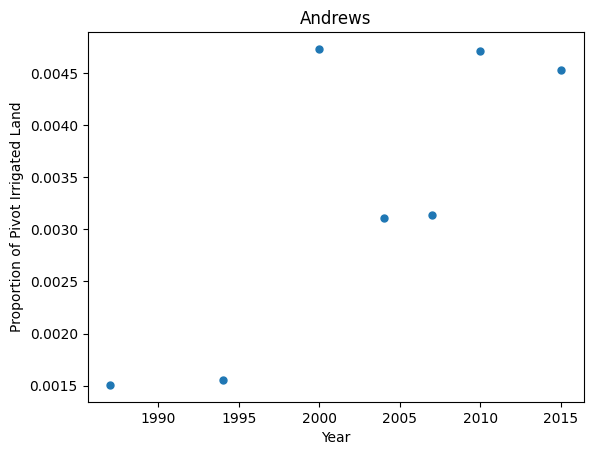

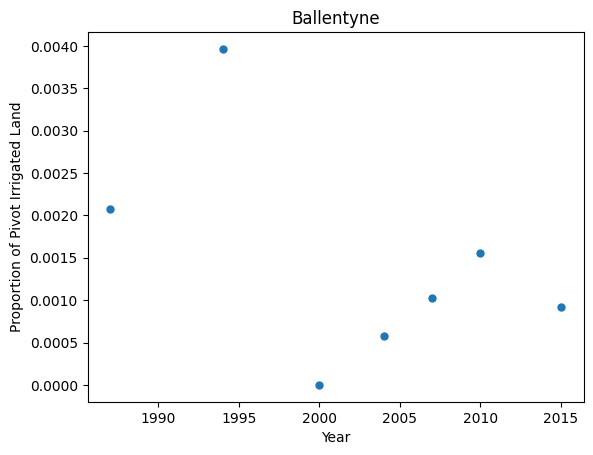

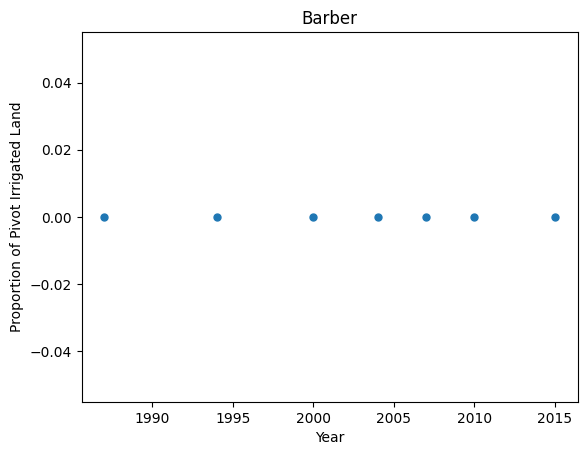

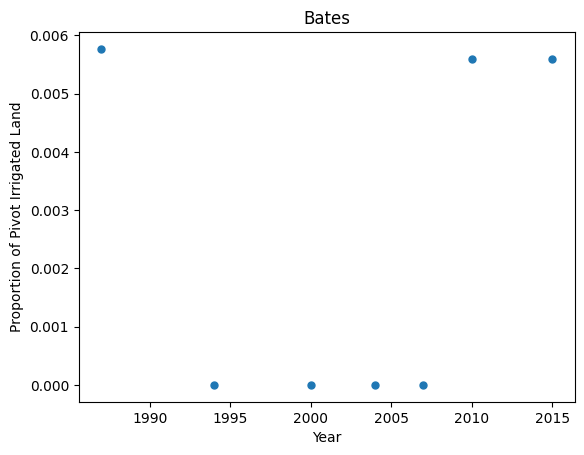

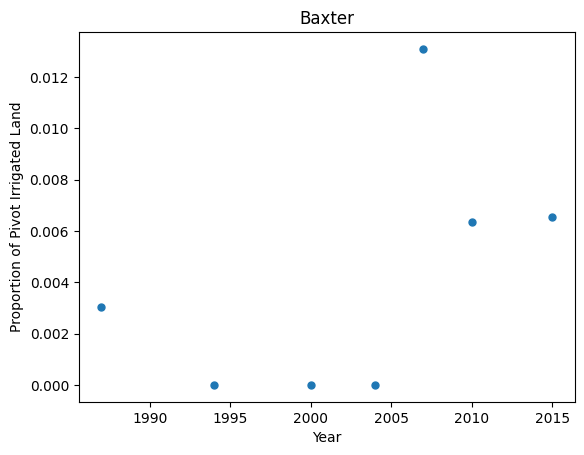

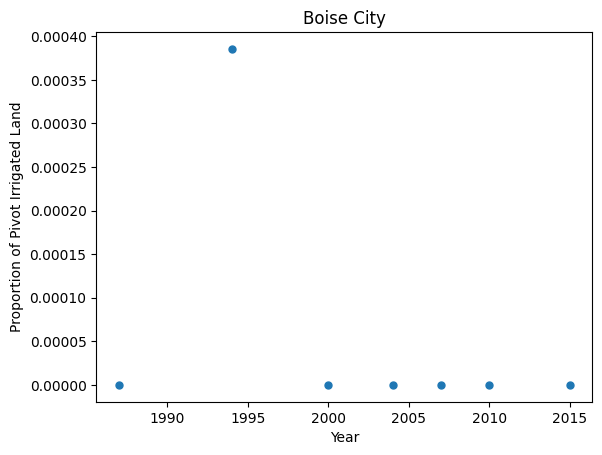

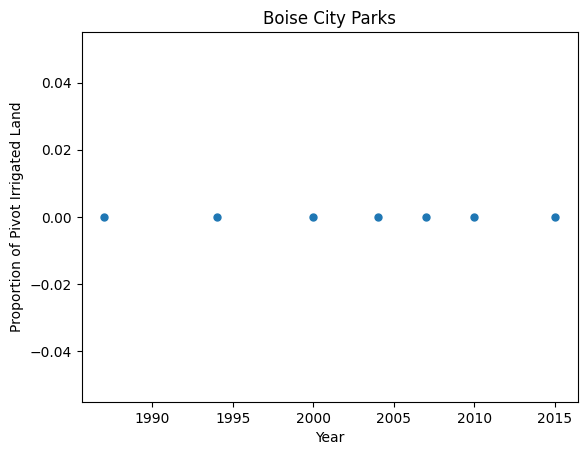

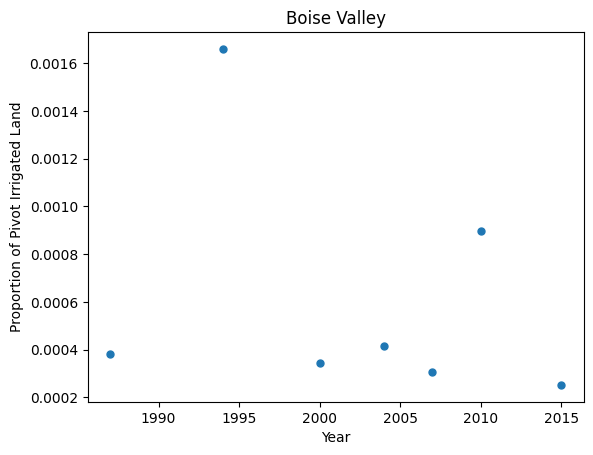

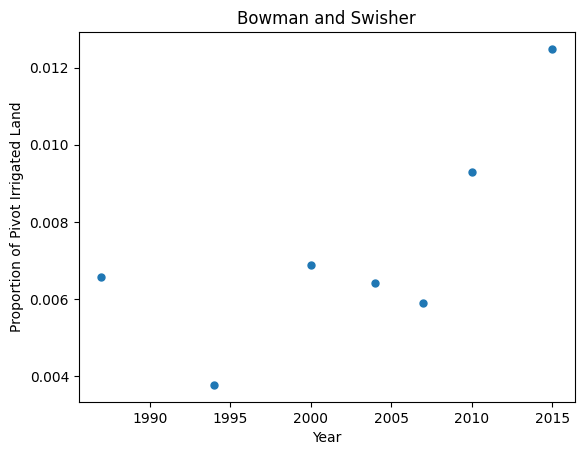

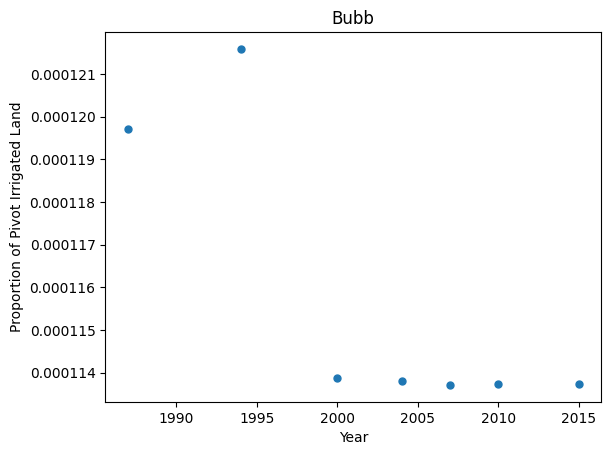

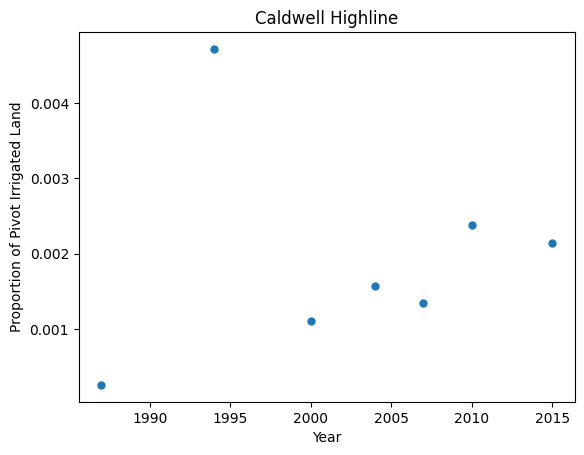

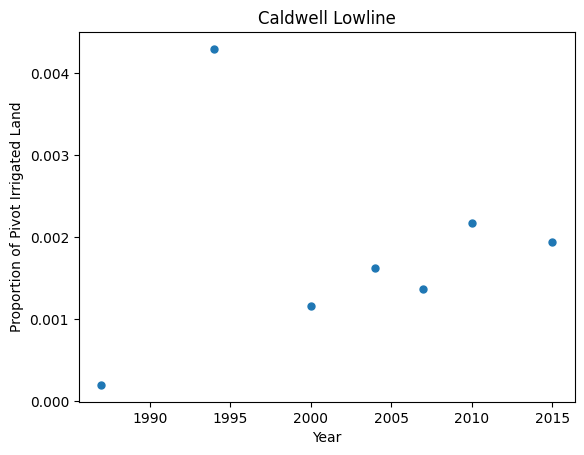

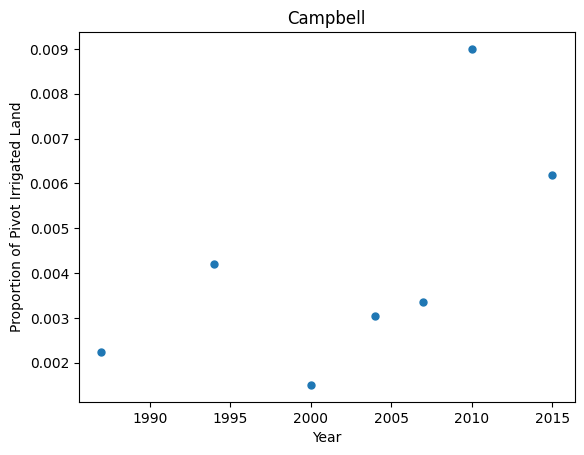

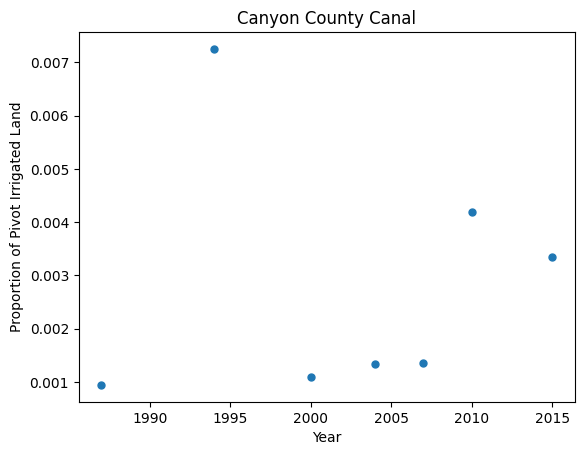

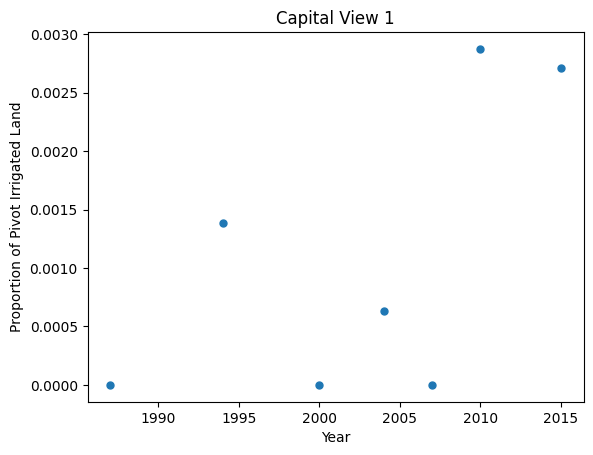

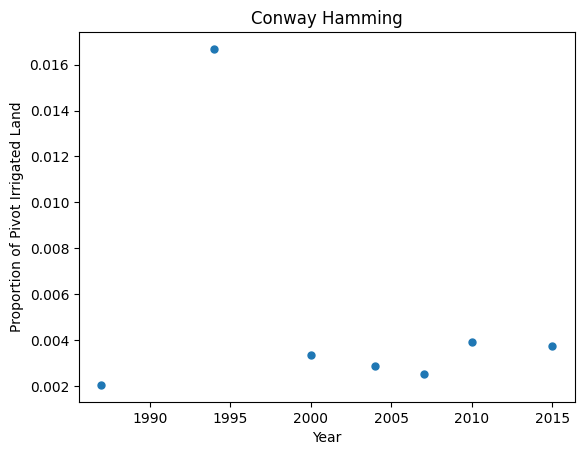

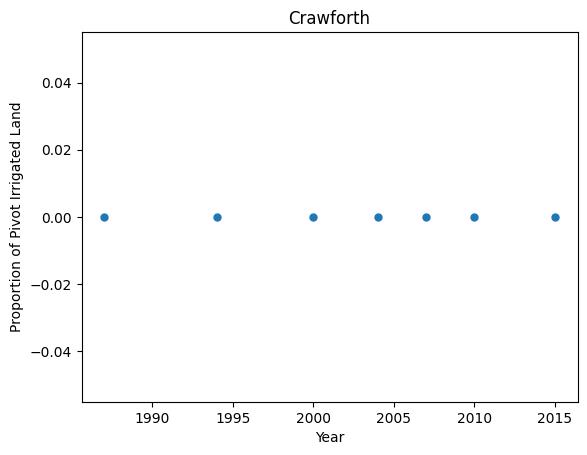

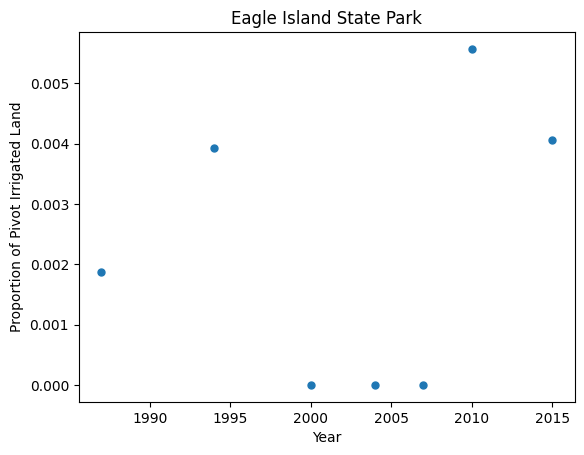

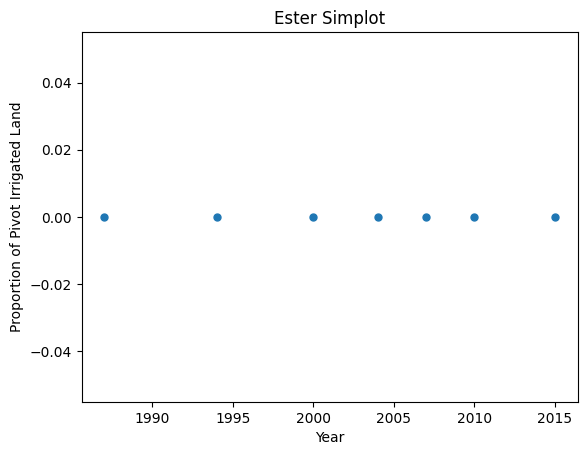

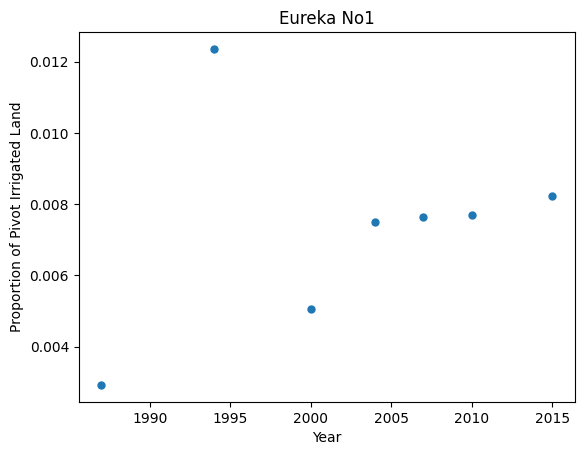

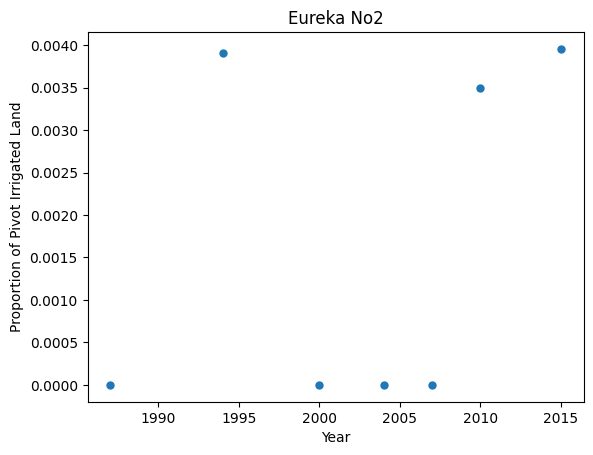

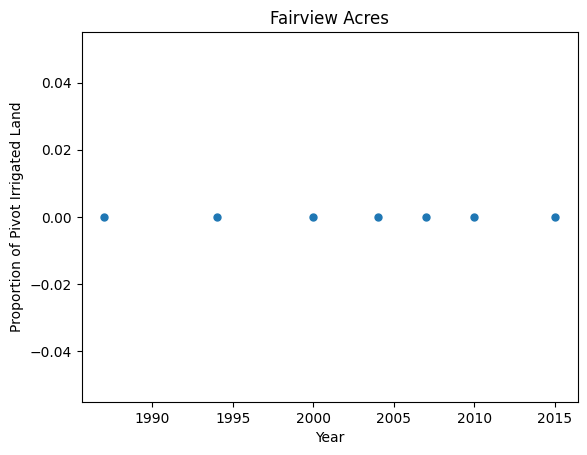

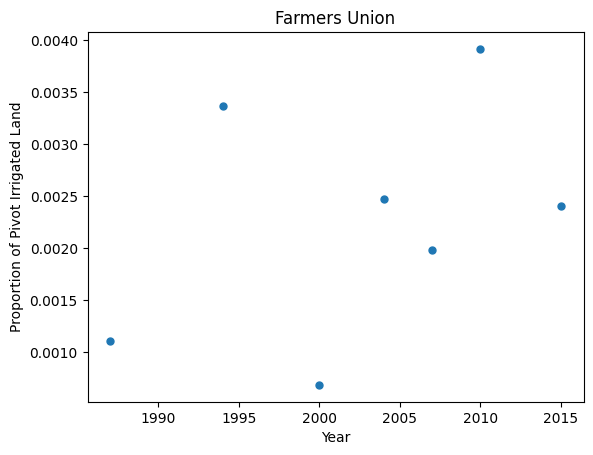

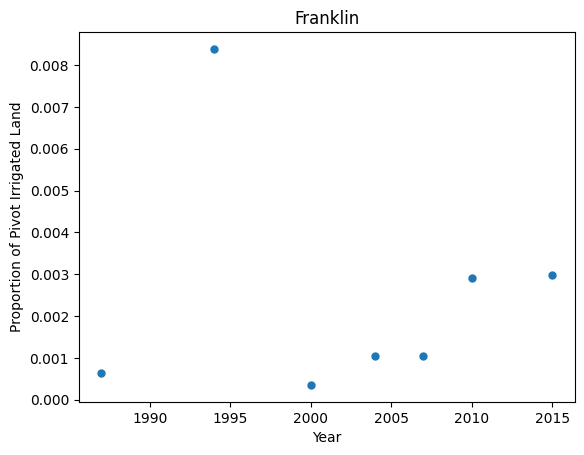

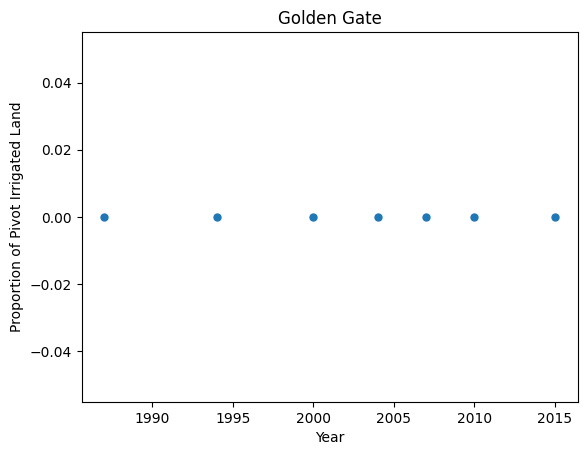

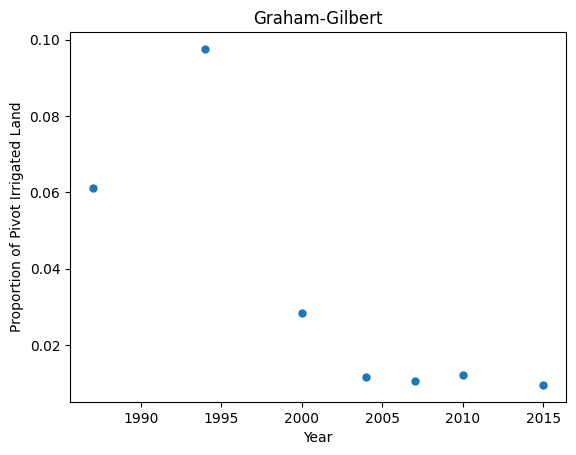

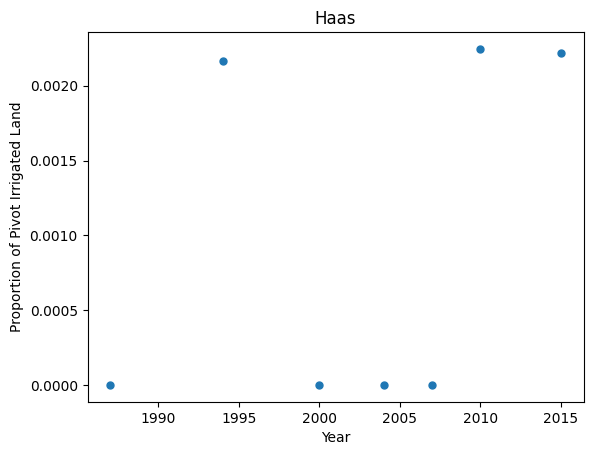

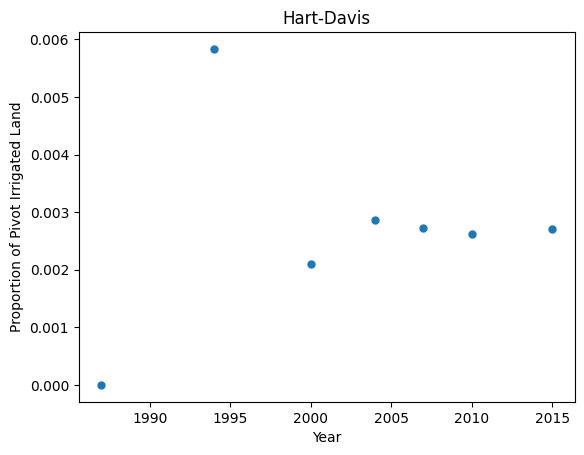

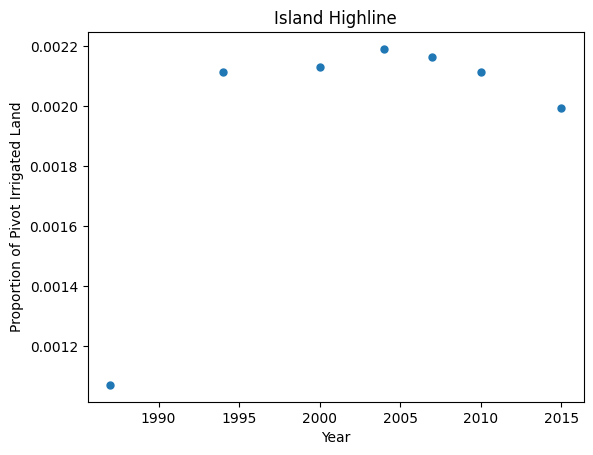

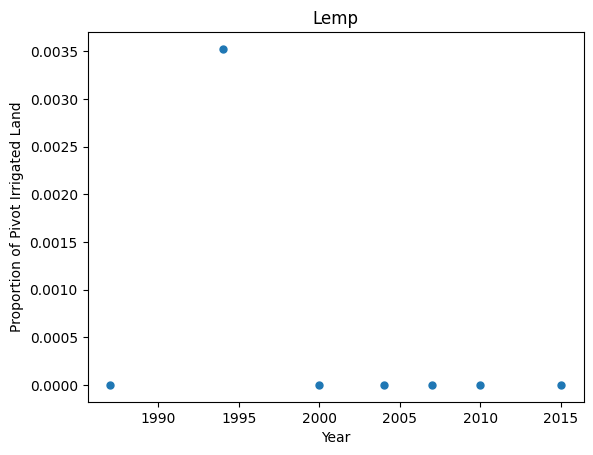

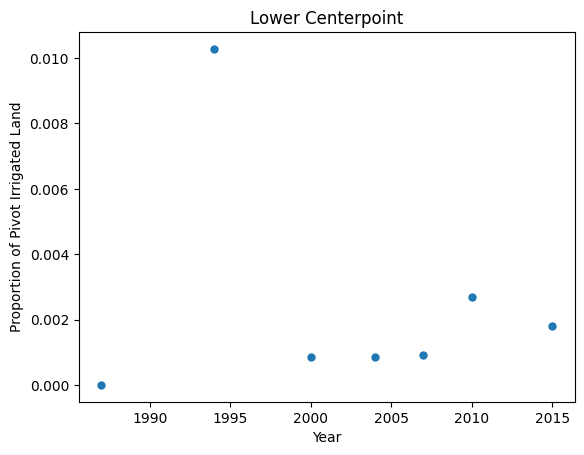

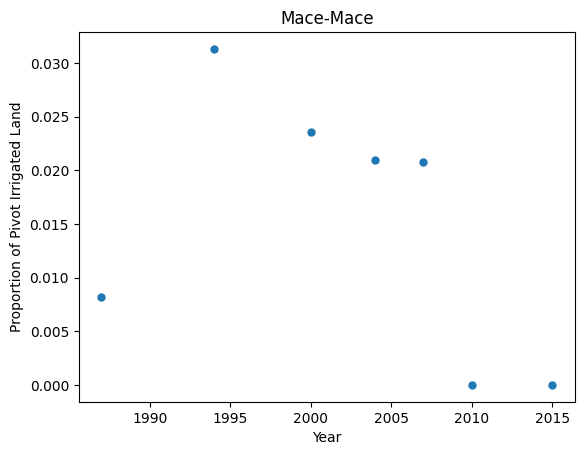

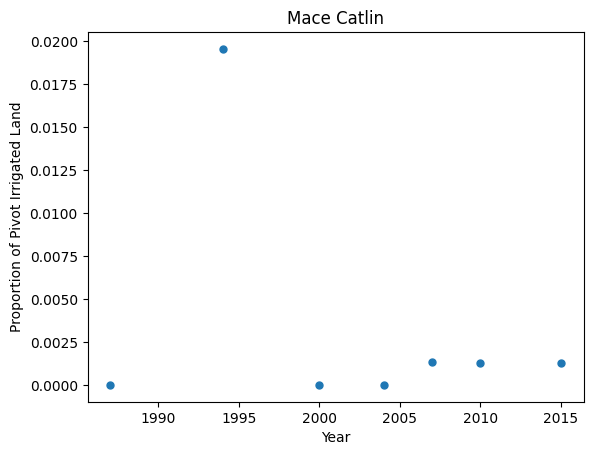

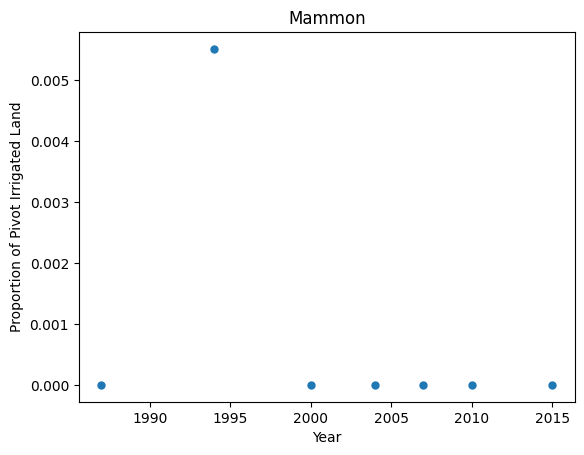

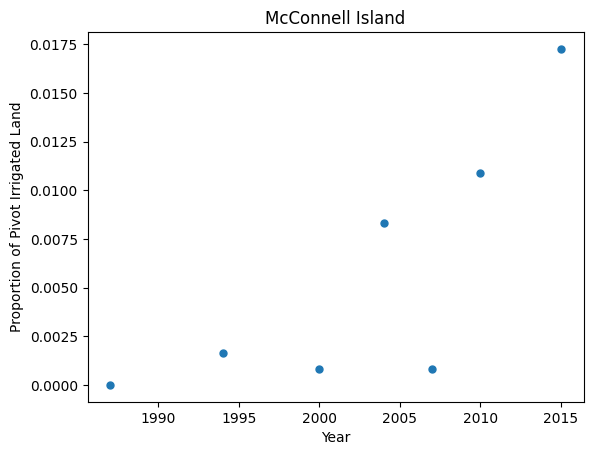

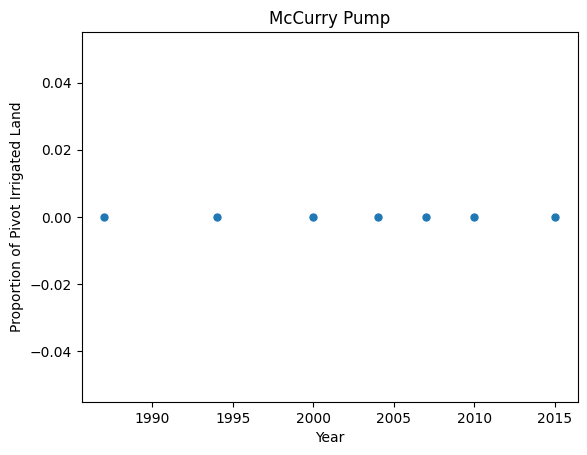

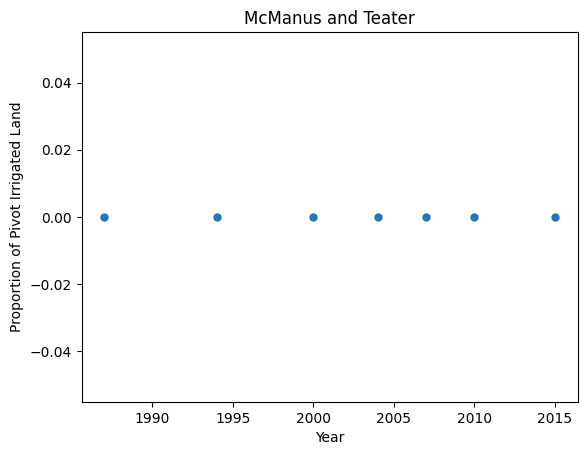

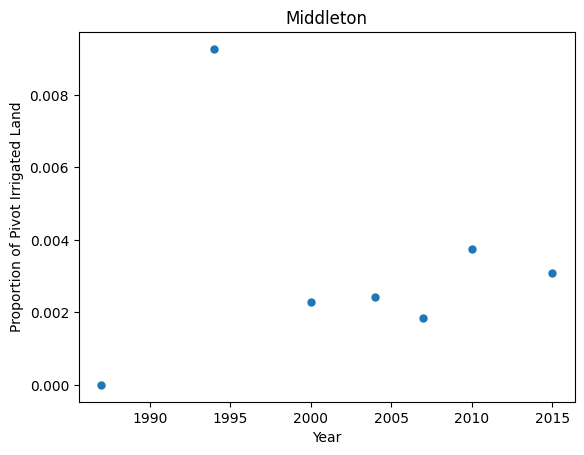

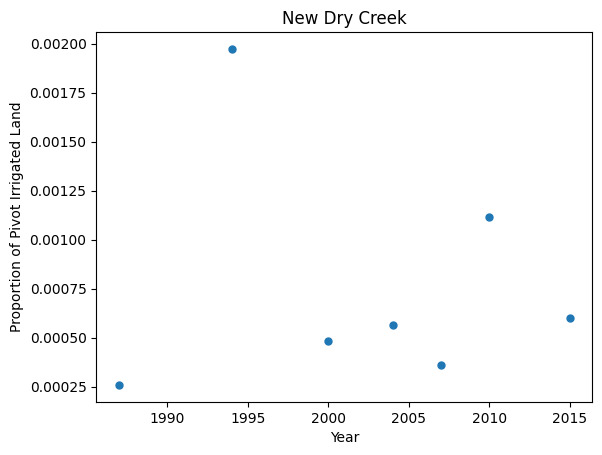

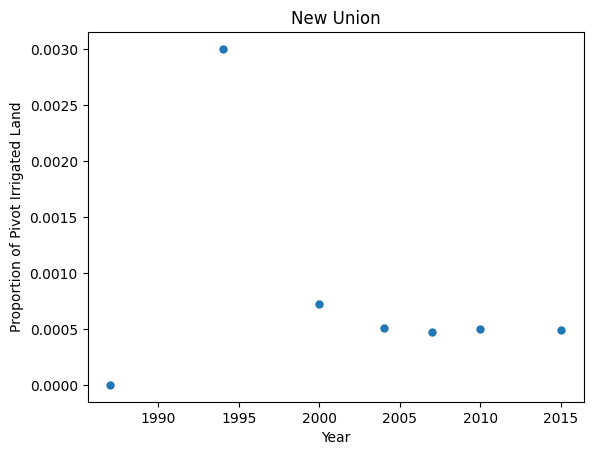

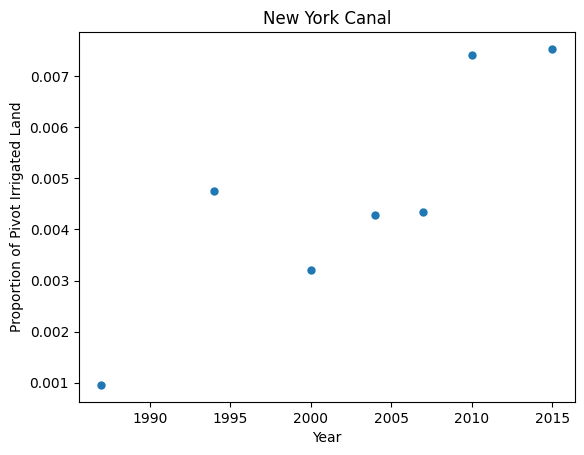

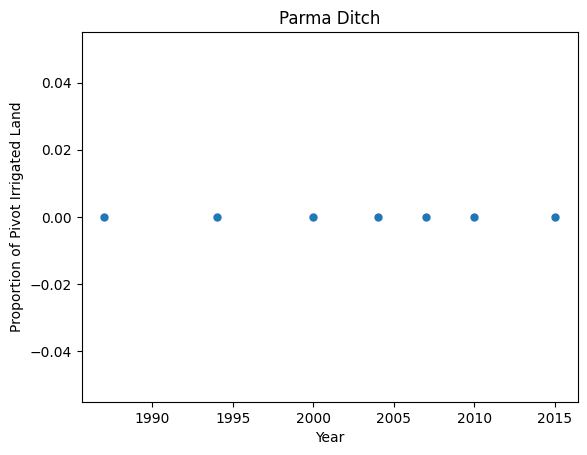

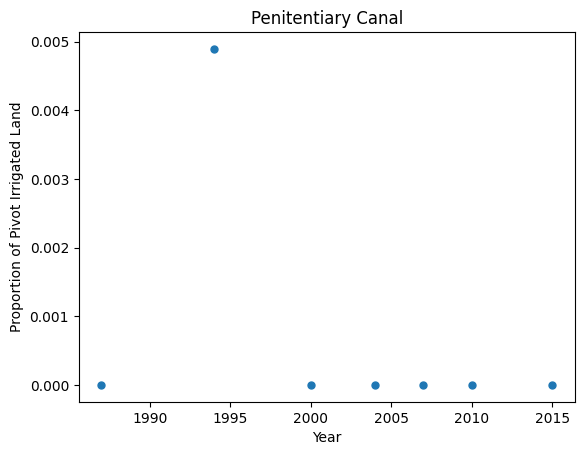

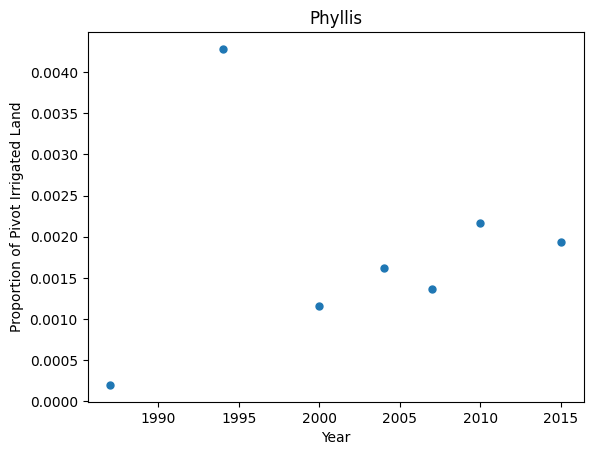

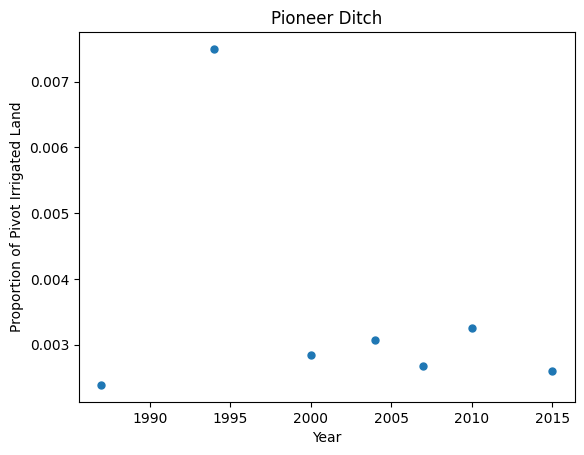

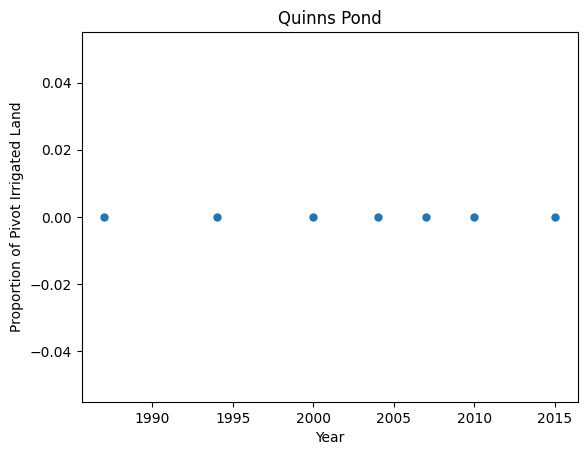

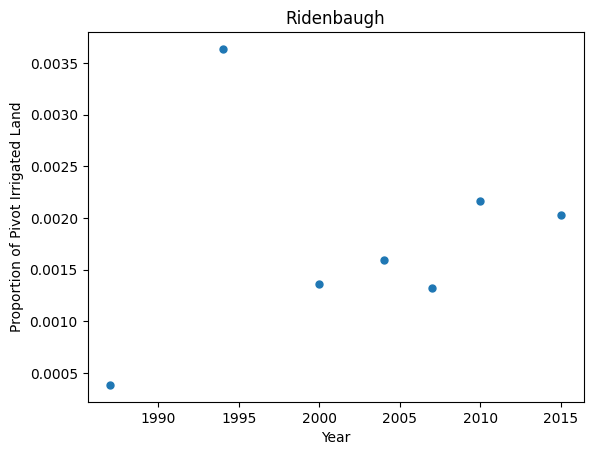

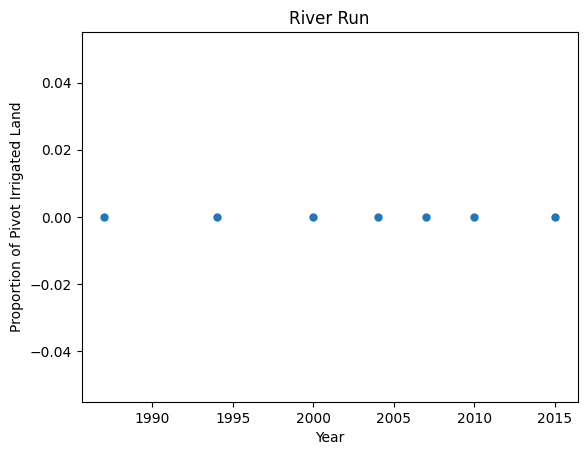

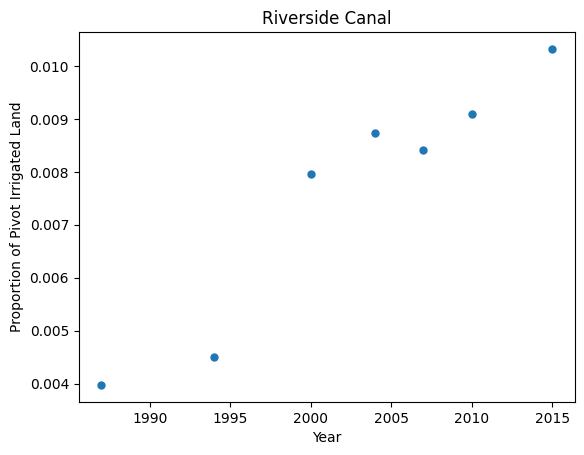

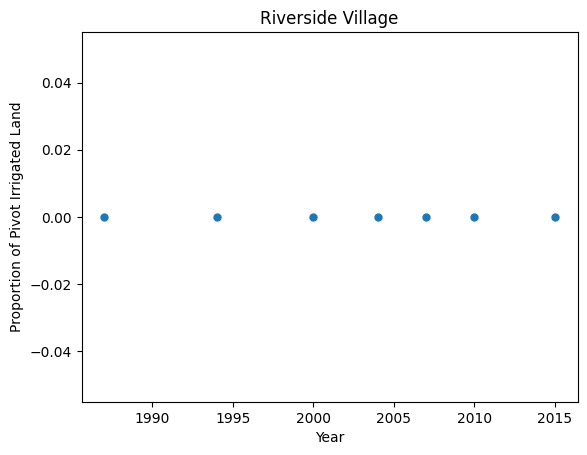

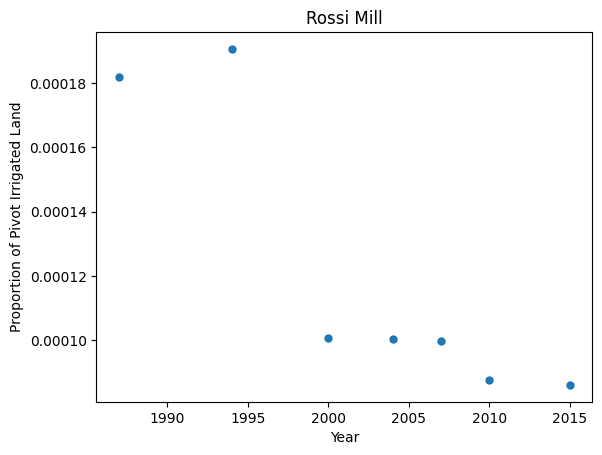

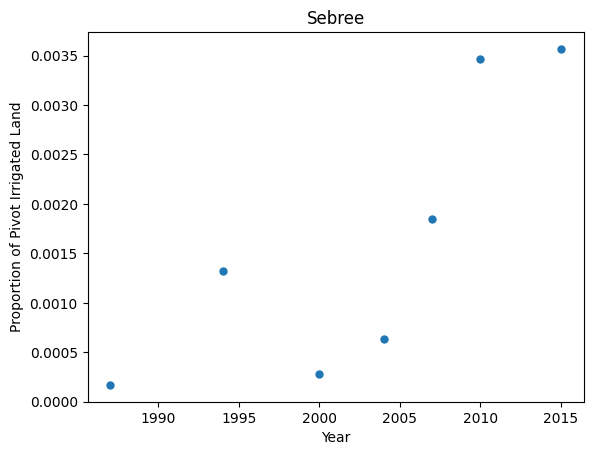

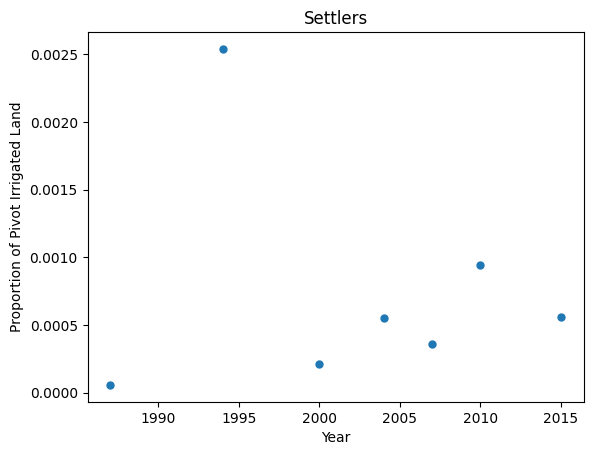

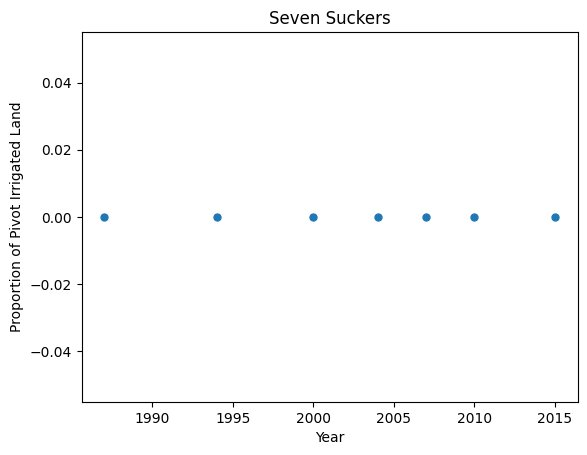

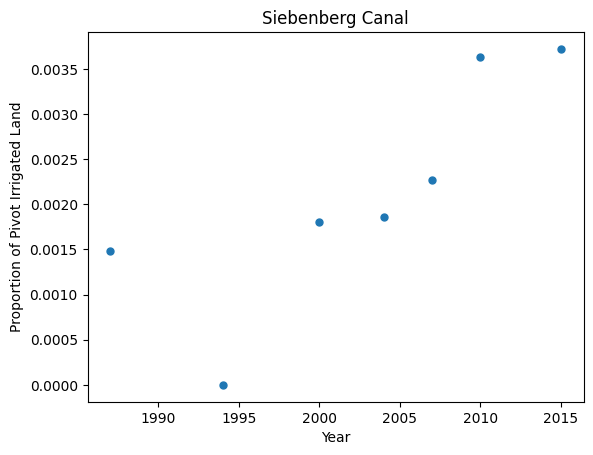

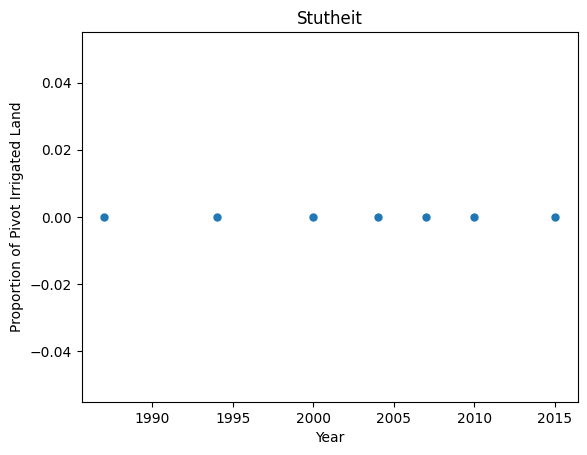

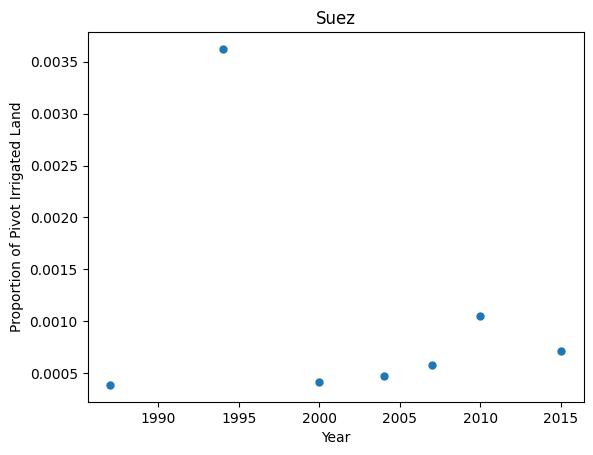

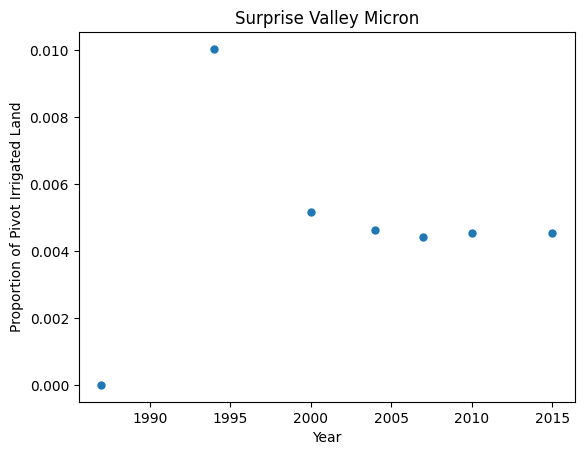

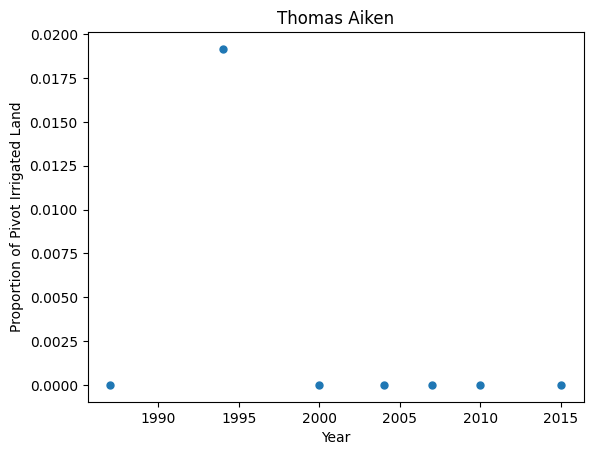

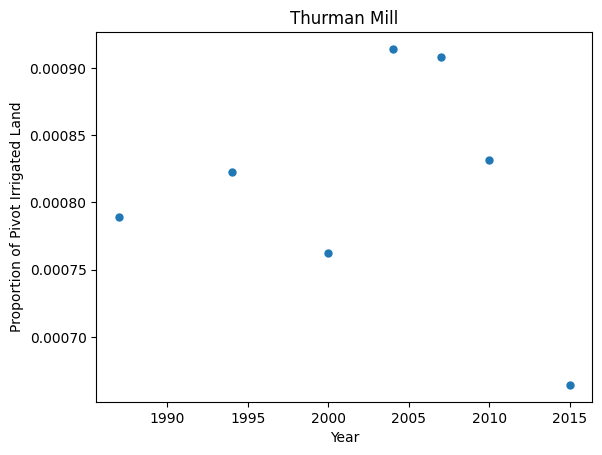

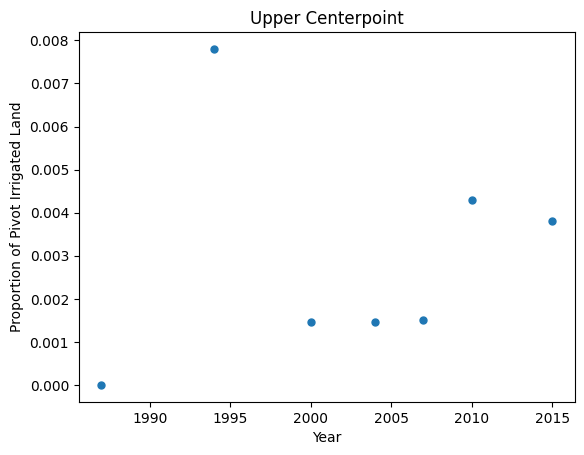

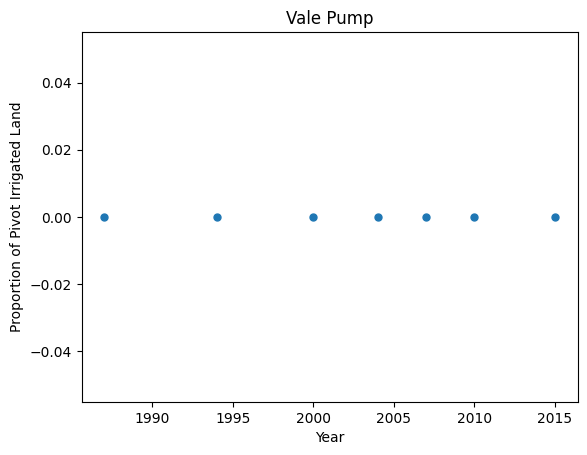

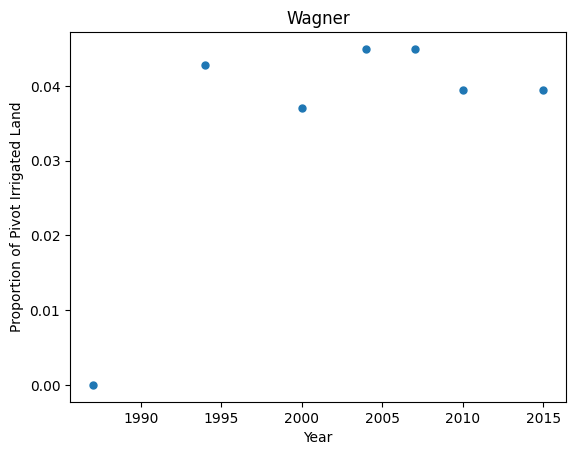

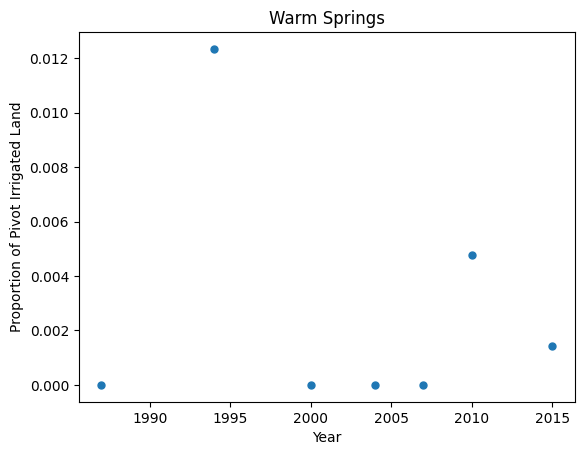

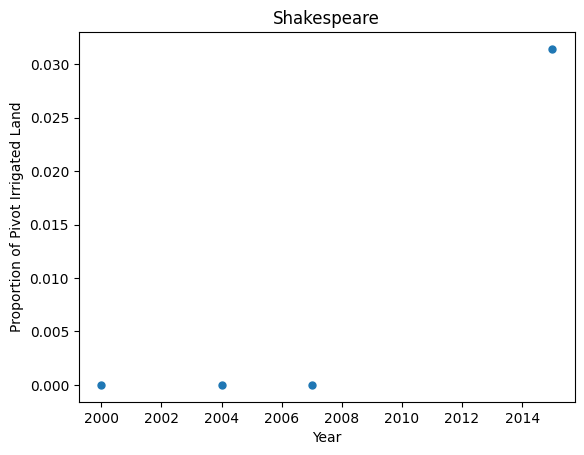

In [23]:
# -------------------------- #
#  Plot for each Diversion   #
# -------------------------- #

names = df['Name'].unique()
grouped = df.groupby('Name')

# Iterate over each unique name
for i in names:
    temp_df = grouped.get_group(i)

    # Extract the year and proportion for plotting
    year = temp_df['Year']
    prop = temp_df['Pivot Proportion']

    plt.plot(year, prop, 'o', markersize=5)
    plt.title(f"{i}")
    plt.xlabel('Year')
    plt.ylabel('Proportion of Pivot Irrigated Land')
    plt.show()

In [24]:
# -------------------------- #
#  Plot for ALL Drainsheds   #
# -------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_change.csv')

grouped = df.groupby('Name')
year = df['Year']

fig = go.Figure()

# Loop through the grouped data
for year, data in grouped:
    fig.add_trace(go.Scatter(
        x=data['Year'],
        y=data['Pivot Proportion'],
        mode='lines',
        name=str(year)
    ))

fig.update_layout(
    title="Irrigation Change in the Treasure Valley Diversions",
    xaxis=dict(title='Year'),
    yaxis=dict(title='Proportion')
)

fig.show()

In [ ]:
# ------------------------------------ #
#  Regresion plot for each Diversion   #
# ------------------------------------ #

# Group the data by 'Name' or any other relevant column
grouped = df.groupby('Name')

# Create a directory to save the plots if it doesn't exist
output_dir = '/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/Figures/div_regressions/'
os.makedirs(output_dir, exist_ok=True)

# Iterate over each group
for name, group in grouped:
    # Initialize and fit the linear regression model for each group
    model = LinearRegression()
    X = group[['Year']]
    y = group['Pivot Proportion']
    model.fit(X, y)

    # Predict values using the fitted model
    group['Predicted_Acres'] = model.predict(X)

    # Calculate the R² value
    r_squared = model.score(X, y)

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=group, x='Year', y='Pivot Proportion', marker='o', label='Actual Data')
    plt.plot(group['Year'], group['Predicted_Acres'], color='red', label='Regression Line')

    # Customize the plot
    plt.title(f'Regression for {name}')
    plt.xlabel('Year')
    plt.ylabel('Proportion of Land Irrigated with Pivot')
    plt.grid(True)
    plt.legend()

    # Annotate the R² value on the plot
    plt.text(
        0.05, 0.85, f'R²: {r_squared:.2f}',
        transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
    )

    plot_filename = f'{name}_regression.tiff'
    plt.savefig(os.path.join(output_dir, plot_filename), format='tiff', dpi=300)
    plt.close()

## 5. Create dataframe from regression data for input into GLMM model

In [25]:
# ----------------------------------------- #
#  Build Data off of Regression for Model   #
# ----------------------------------------- #

grouped = df.groupby('Name')

all_predictions = pd.DataFrame()

for name, group in grouped:
    # Initialize and fit the linear regression model for each group
    model = LinearRegression()
    X = group[['Year']]
    y = group['Pivot Proportion']
    model.fit(X, y)

    # Predict values for the years 1987 to 2022
    future_years = pd.DataFrame({'Year': np.arange(1987, 2023)})
    predicted_proportions = model.predict(future_years)

    # Create a DataFrame for the predictions
    predictions_df = pd.DataFrame({
        'Year': future_years['Year'],
        'Name': name,
        'Predicted_Proportion': predicted_proportions
    })

    # Append the predictions to the overall DataFrame
    all_predictions = pd.concat([all_predictions, predictions_df], ignore_index=True)

all_predictions.to_csv('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_model_input.csv', index=False)

In [29]:
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_model_input.csv')
file['Name'].unique()

array(['Andrews', 'Ballentyne', 'Barber', 'Bates', 'Baxter', 'Boise City',
       'Boise City Parks', 'Boise Valley', 'Bowman and Swisher', 'Bubb',
       'Caldwell Highline', 'Caldwell Lowline', 'Campbell',
       'Canyon County Canal', 'Capital View 1', 'Conway Hamming',
       'Crawforth', 'Eagle Island State Park', 'Ester Simplot',
       'Eureka No1', 'Eureka No2', 'Fairview Acres', 'Farmers Union',
       'Franklin', 'Golden Gate', 'Graham-Gilbert', 'Haas', 'Hart-Davis',
       'Island Highline', 'Lemp', 'Lower Centerpoint', 'Mace Catlin',
       'Mace-Mace', 'Mammon', 'McConnell Island', 'McCurry Pump',
       'McManus and Teater', 'Middleton', 'New Dry Creek', 'New Union',
       'New York Canal', 'Parma Ditch', 'Penitentiary Canal', 'Phyllis',
       'Pioneer Ditch', 'Quinns Pond', 'Ridenbaugh', 'River Run',
       'Riverside Canal', 'Riverside Village', 'Rossi Mill', 'Sebree',
       'Settlers', 'Seven Suckers', 'Shakespeare', 'Siebenberg Canal',
       'Stutheit', 'Suez', 'S

In [30]:
# ------------------------------------- #
#  Rename Diversions to Match Dataset   #
# ------------------------------------- #
# inputted because old data set wasn't merging correctly with model input

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_model_input.csv')

def rename_names_in_csv(input_csv_path, output_csv_path, name_mapping):
    """
    Rename names in the 'Name' column of a CSV file.

    Parameters:
    input_csv_path (str): Path to the input CSV file.
    output_csv_path (str): Path to save the modified CSV file.
    name_mapping (dict): Dictionary where keys are old names and values are new names.

    """
    df = pd.read_csv(input_csv_path)
    if 'Name' not in df.columns:
        raise ValueError("The CSV file does not contain a 'Name' column.")
    df['Name'] = df['Name'].replace(name_mapping)
    df.to_csv(output_csv_path, index=False)
    print(f"CSV file with updated names saved to {output_csv_path}")

if __name__ == "__main__":
    input_csv = '/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_model_input.csv'
    output_csv = '/content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_model_input2.csv'

    # Dictionary with old names as keys and new names as values
    name_changes = {
        'Ballentyne': 'Ballentyne Canal',
        'Barber': 'Barber pumps',
        'Boise City': 'Boise City Canal',
        'Boise Valley': 'Boise Valley Canal',
        'Bubb': 'Bubb Canal',
        'Caldwell Highline': 'Caldwell Highline Canal',
        'Caldwell Lowline': 'Caldwell Lowline Canal',
        'Campbell': 'Campbell Canal',
        'Capital View 1': 'Capital View Canal',
        'Conway Hamming': 'Conway-Hamming Canal',
        'Eureka No1': 'Eureka No1 Canal',
        'Eureka No2': 'Eureka No2 Canal',
        'Farmers Union': 'Farmers Union Canal',
        'Golden Gate': 'Golden Gate Canal',
        'Graham-Gilbert': 'Graham-Gilbert Canal',
        'Hart-Davis': 'Hart-Davis Canal',
        'Island Highline': 'Island Highline Canal',
        'Lemp': 'Lemp Canal',
        'Lower Centerpoint': 'Lower Center Point',
        'Mace Catlin': 'Mace-Catlin Canal',
        'Mace-Mace': 'Mace-Mace Canal',
        'McManus and Teater': 'McManus and Teater Canal',
        'Middleton': 'Middleton Canal',
        'New Dry Creek': 'New Dry Creek Canal',
        'New Union': 'New Union Canal',
        'Phyllis': 'Phyllis Canal',
        'Pioneer Ditch': 'Pioneer Ditch',
        'Ridenbaugh': 'Ridenbaugh Canal',
        'Rossi Mill': 'Rossi Mill and Meeves Canals',
        'Sebree': 'Sebree Canal',
        'Settlers': 'Settlers Canal',
        'Seven Suckers': 'Seven Suckers Canal',
        'Surprise Valley Micron': 'Surprise Valley and Micron',
        'Thomas Aiken': 'Thomas Aiken Canal',
        'Thurman Mill': 'Thurman Mill Canal',
        'Upper Center Point': 'Upper Center Point Canal',
        'Wagner': 'Shipley and Wagner Pumps',
        'Warm Springs': 'Warm Springs Canal'
    }

    rename_names_in_csv(input_csv, output_csv, name_changes)

CSV file with updated names saved to /content/drive/MyDrive/Data/Model Modifications/div_irrigation_change/div_irrigation_model_input2.csv
